# Compute Spectra and store as collection files
#
#
#
#
#
#

In [1]:
import os
import gc
import matplotlib.pyplot as plt

from spectra import spectra


## Configurations

### Example 1 for raw ROMY components

In [2]:
config = {
    # Required time window parameters
    # 'tbeg': "2024-01-04 00:00:00",  # Start time
    # 'tend': "2024-01-05 00:00:00",  # End time
    'tbeg': "2023-09-01",  # Start time
    'tend': "2023-09-09",  # End time

    # SEED identifiers
    # 'seeds': ["BW.ROMY.10.BJZ", "BW.ROMY..BJU", "BW.ROMY..BJV"],     # Default seed ID
    'seeds': ["BW.ROMY.00.BJZ", "BW.ROMY.00.BJN", "BW.ROMY.00.BJE"],     # Default seed ID

    # Path to SDS for rotation and translation data
    # 'path_to_sds': "/home/andbro/freenas/romy_archive/",    # SDS path for rotation data
    'path_to_sds': "/home/andbro/freenas/temp_archive/",    # SDS path for rotation data

    # Path configurations
    'path_to_data_out': "./data/spectra/",  # Output directory
    'path_to_figures_out': "./figures/spectra_plots/",  # Output directory

    # Time interval parameters for spectra
    'tinterval': 3600,  # time interval in seconds
    'toverlap': 0,  # time overlap in seconds
    'method' : 'welch',  # welch | multitaper | fft

    # Average in octave frequency bands
    'apply_average': True,
    'fraction_of_octave': 6,
    'averaging': 'median',

    # Inventory file
    'remove_response': True,
    'inventory_file': "/home/andbro/kilauea-data/stationxml_ringlaser/station_BW_ROMY.xml",

    # Set data unit for spectra
    'data_unit': 'rad/s',

    # Optional parameters
    # 'verbose': True,            # Print detailed information
}

In [3]:
config = {
    # Required time window parameters
    # 'tbeg': "2024-01-04 00:00:00",  # Start time
    # 'tend': "2024-01-05 00:00:00",  # End time
    'tbeg': "2023-09-07",  # Start time
    'tend': "2023-09-09",  # End time

    # SEED identifiers
    # 'seeds': ["BW.ROMY.10.BJZ", "BW.ROMY..BJU", "BW.ROMY..BJV"],     # Default seed ID
    'seeds': ["BW.ROMY.00.BJZ", "BW.ROMY.00.BJN", "BW.ROMY.00.BJE"],     # Default seed ID

    # Path to SDS for rotation and translation data
    # 'path_to_sds': "/home/andbro/freenas/romy_archive/",    # SDS path for rotation data
    'path_to_sds': "/home/andbro/freenas/temp_archive/",    # SDS path for rotation data

    # Path configurations
    'path_to_data_out': "./data/spectra/",  # Output directory
    'path_to_figures_out': "./figures/spectra_plots/",  # Output directory

    # Time interval parameters for spectra
    'tinterval': 3600,  # time interval in seconds
    'toverlap': 0,  # time overlap in seconds
    'method' : 'welch',  # welch | multitaper | fft

    # Average in octave frequency bands
    'apply_average': True,
    'fraction_of_octave': 6,
    'averaging': 'median',

    # Inventory file
    'remove_response': False,
    'inventory_file': "/home/andbro/kilauea-data/stationxml_ringlaser/station_BW_ROMY.xml",

    # Set data unit for spectra
    'data_unit': 'rad/s',

    # Optional parameters
    # 'verbose': True,            # Print detailed information
}

### Example 2 for processed ROMY components

In [4]:
# config = {
#     # Required time window parameters
#     'tbeg': "2024-01-04 00:00:00",  # Start time
#     'tend': "2024-01-05 00:00:00",  # End time

#     # SEED identifiers
#     'seeds': ["BW.ROMY.30.BJZ", "BW.ROMY.30.BJE", "BW.ROMY.30.BJN"],     # Default seed ID

#     # Path to SDS for rotation and translation data
#     'path_to_sds': "/home/andbro/freenas/temp_archive/",    # SDS path for rotation data

#     # Path configurations
#     'path_to_data_out': "./data/spectra/",  # Output directory
#     'path_to_figures_out': "./figures/spectra_plots/",  # Output directory

#     # Time interval parameters for spectra
#     'tinterval': 3600,  # time interval in seconds
#     'toverlap': 0,  # time overlap in seconds
#     'method' : 'welch',  # welch | multitaper | fft

#     # Average in octave frequency bands
#     'apply_average': True,
#     'fraction_of_octave': 6,
#     'averaging': 'median',

#     # Inventory file
#     'remove_response': False,

#     # Set data unit for spectra
#     'data_unit': 'rad/s',

#     # Optional parameters
#     # 'verbose': True,            # Print detailed information
# }

### Example 3 for FUR station

In [5]:
# config = {
#     # Required time window parameters
#     'tbeg': "2024-01-04 00:00:00",  # Start time
#     'tend': "2024-01-05 00:00:00",  # End time

#     # SEED identifiers
#     'seed': "GR.FUR..BHZ",     # Default seed ID

#     # Path to SDS for rotation and translation data
#     'path_to_sds': "/home/andbro/bay200/mseed_online/archive/",    # SDS path for rotation data

#     # Path configurations
#     'path_to_data_out': "./data/spectra/",  # Output directory
#     'path_to_figures_out': "./figures/spectra_plots/",  # Output directory

#     # Time interval parameters for spectra
#     'tinterval': 3600,  # time interval in seconds
#     'toverlap': 0,  # time overlap in seconds
#     'method' : 'welch',  # welch | multitaper | fft

#     # Average in octave frequency bands
#     'apply_average': True,
#     'fraction_of_octave': 6,
#     'averaging': 'median',

#     # Inventory file
#     'remove_response': True,
#     'inventory_file': "/home/andbro/kilauea-data/stationxml_ringlaser/station_GR_FUR.xml",
#     'output_type': 'ACC',

#     'data_unit': r'm/s$^2$',

#   # Optional parameters
#     # 'verbose': True,            # Print detailed information
# }

In [6]:
sp = spectra()

In [7]:
times = sp.get_time_intervals_static(
    config.get('tbeg', None),
    config.get('tend', None),
    t_interval=86400,
    t_overlap=0,
)

2023-09-07
 -> detrend stream...


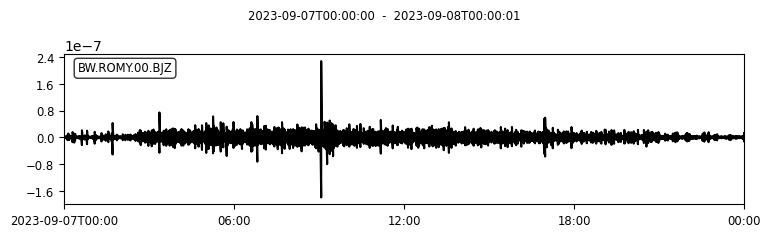

Quality classification: 24 good, 0 bad
Saved to: ./data/spectra/2023/BW/ROMY/BJZ/20230907_BW_ROMY_00_BJZ_spectra.pkl


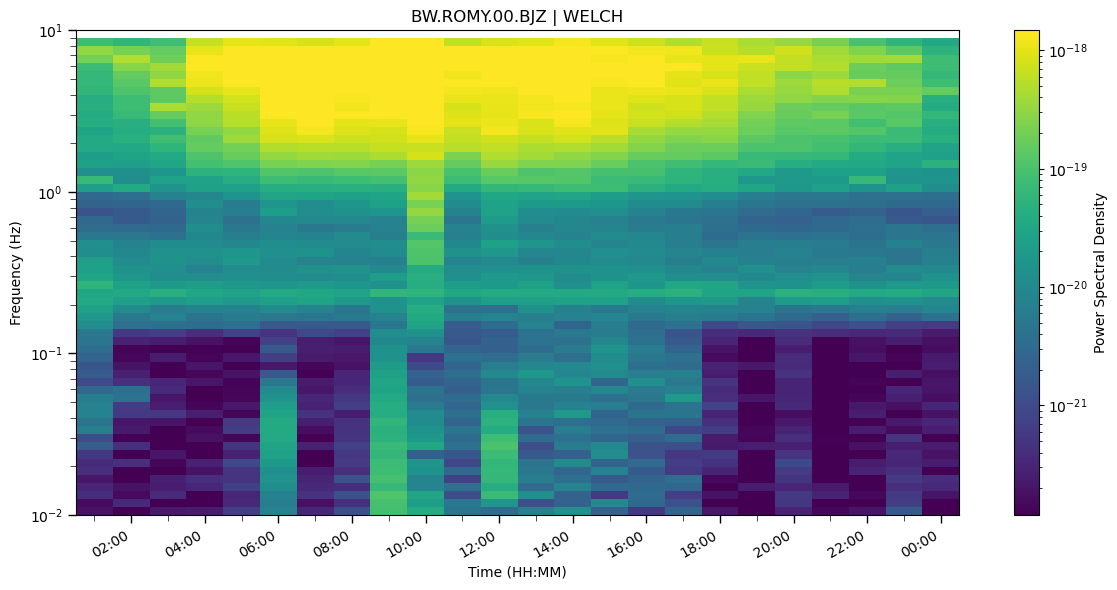

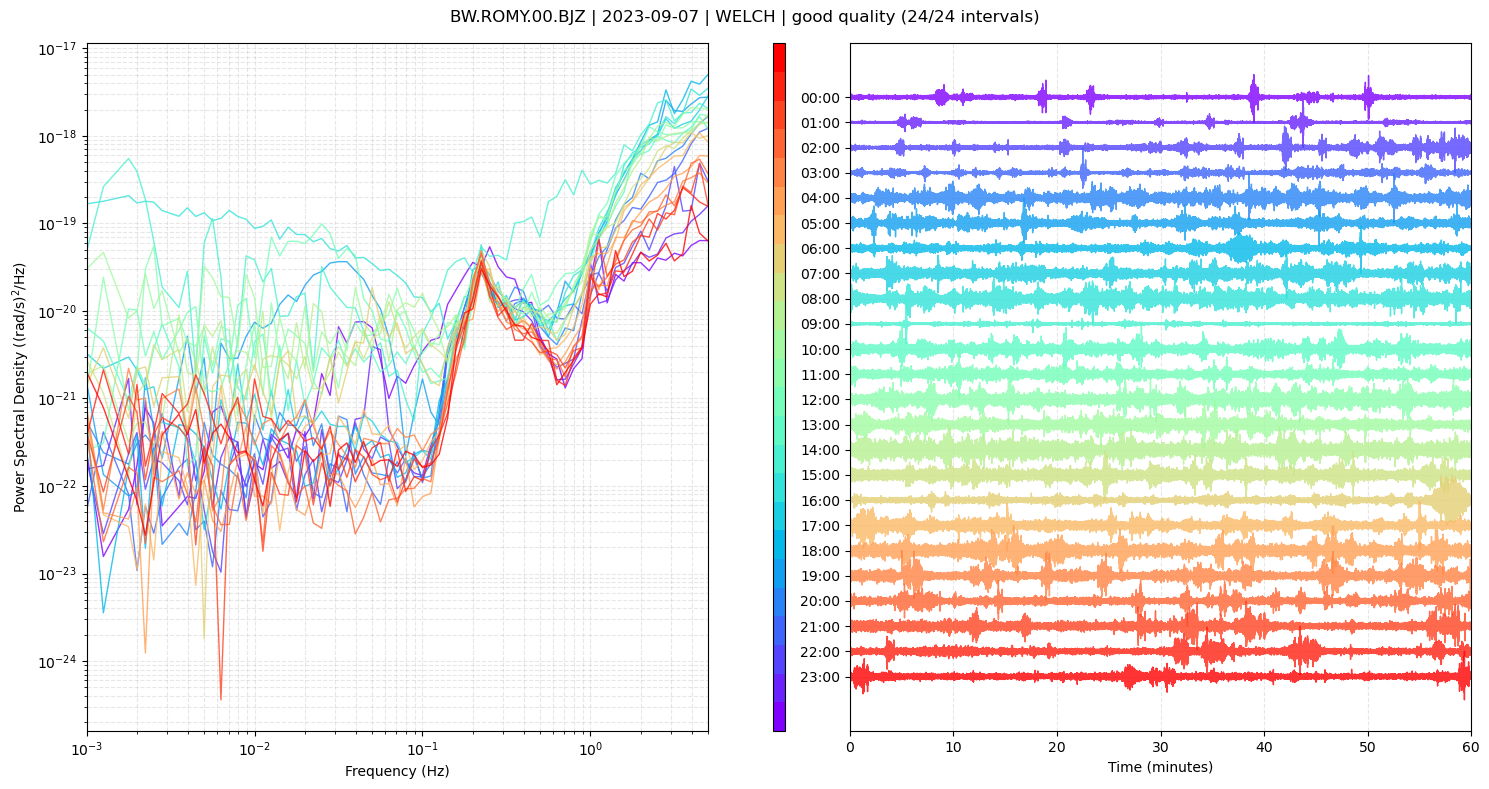

 -> detrend stream...


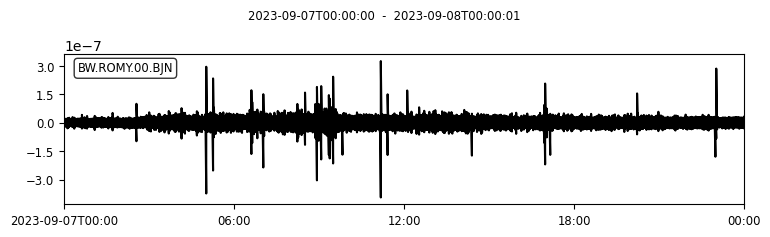

Quality classification: 23 good, 1 bad
Saved to: ./data/spectra/2023/BW/ROMY/BJN/20230907_BW_ROMY_00_BJN_spectra.pkl
Filtered spectrum at index 2 (quality != good)


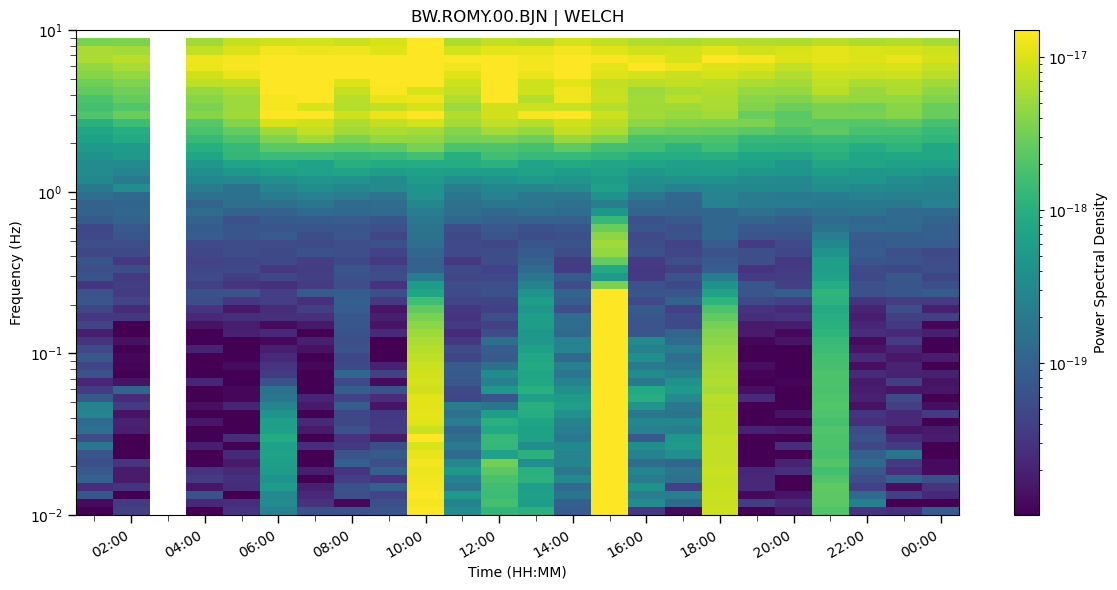

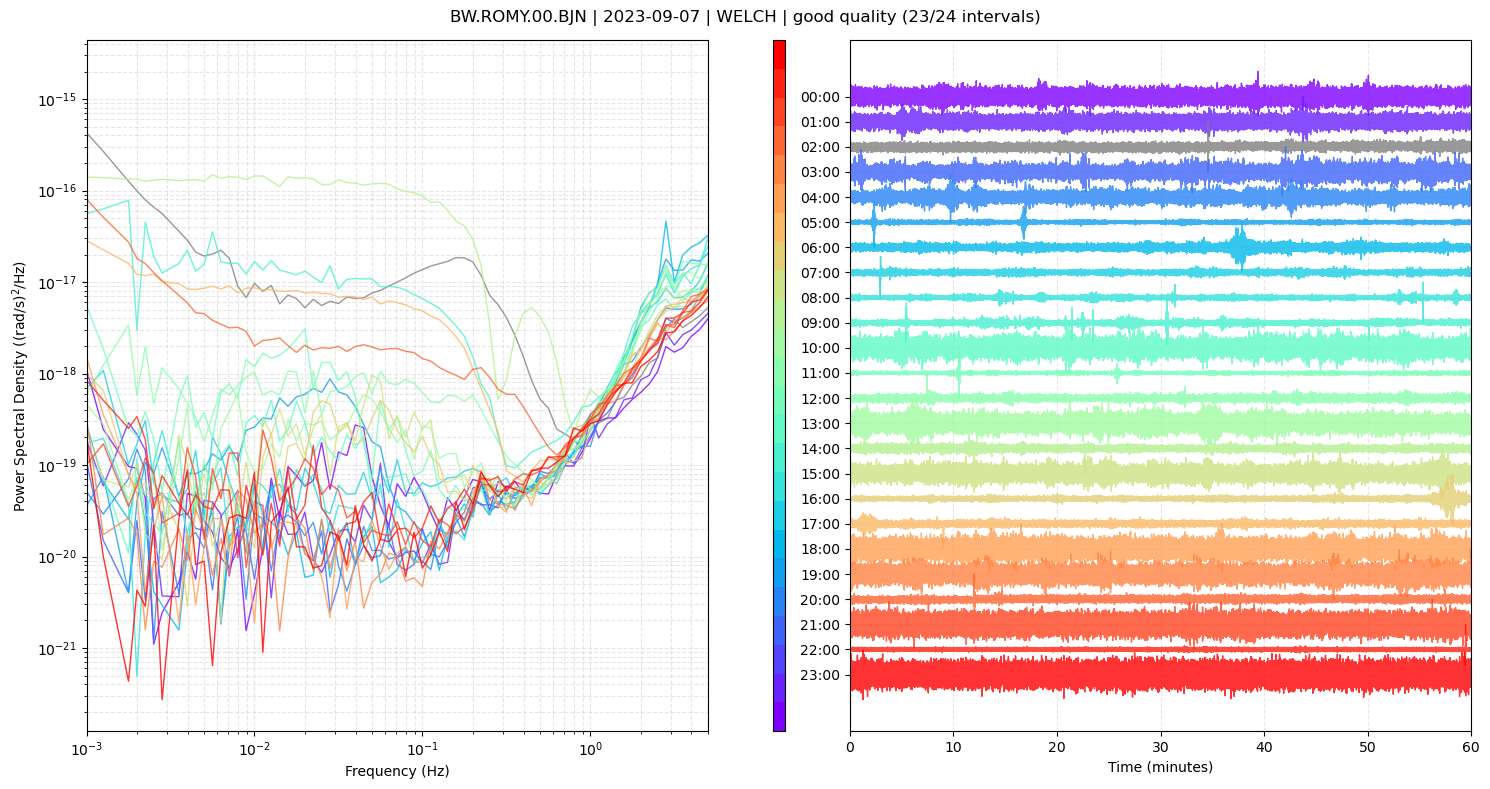

 -> detrend stream...


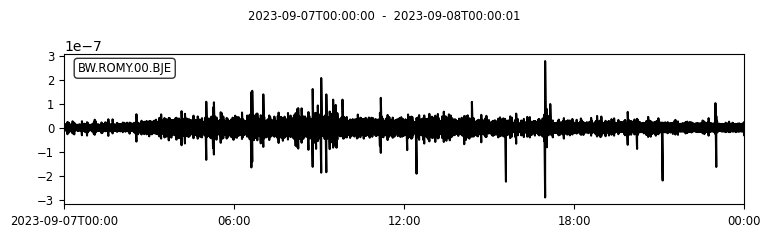

Quality classification: 24 good, 0 bad
Saved to: ./data/spectra/2023/BW/ROMY/BJE/20230907_BW_ROMY_00_BJE_spectra.pkl


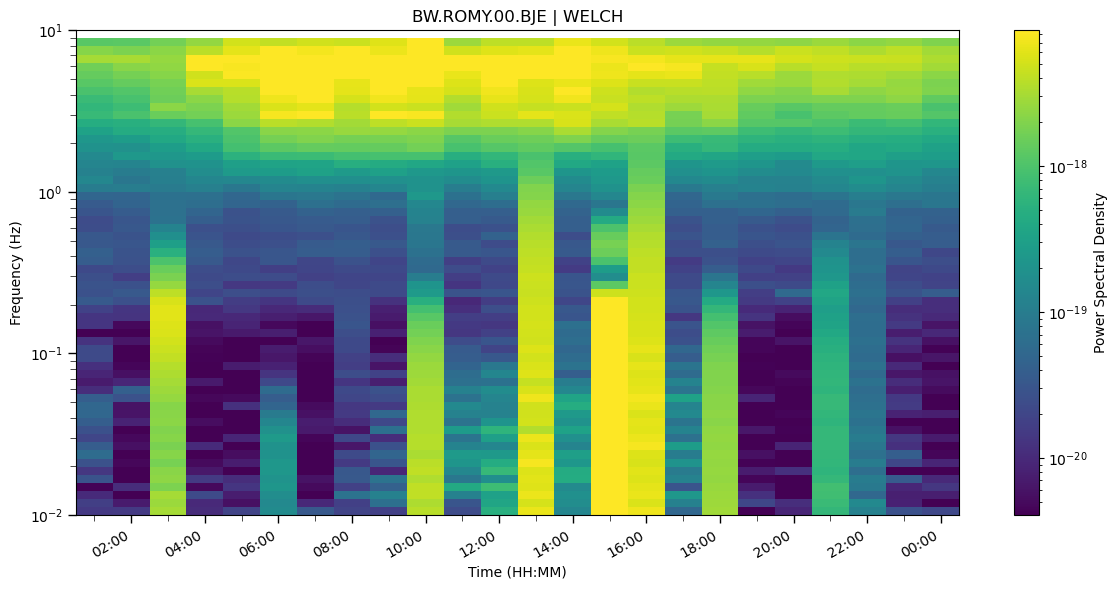

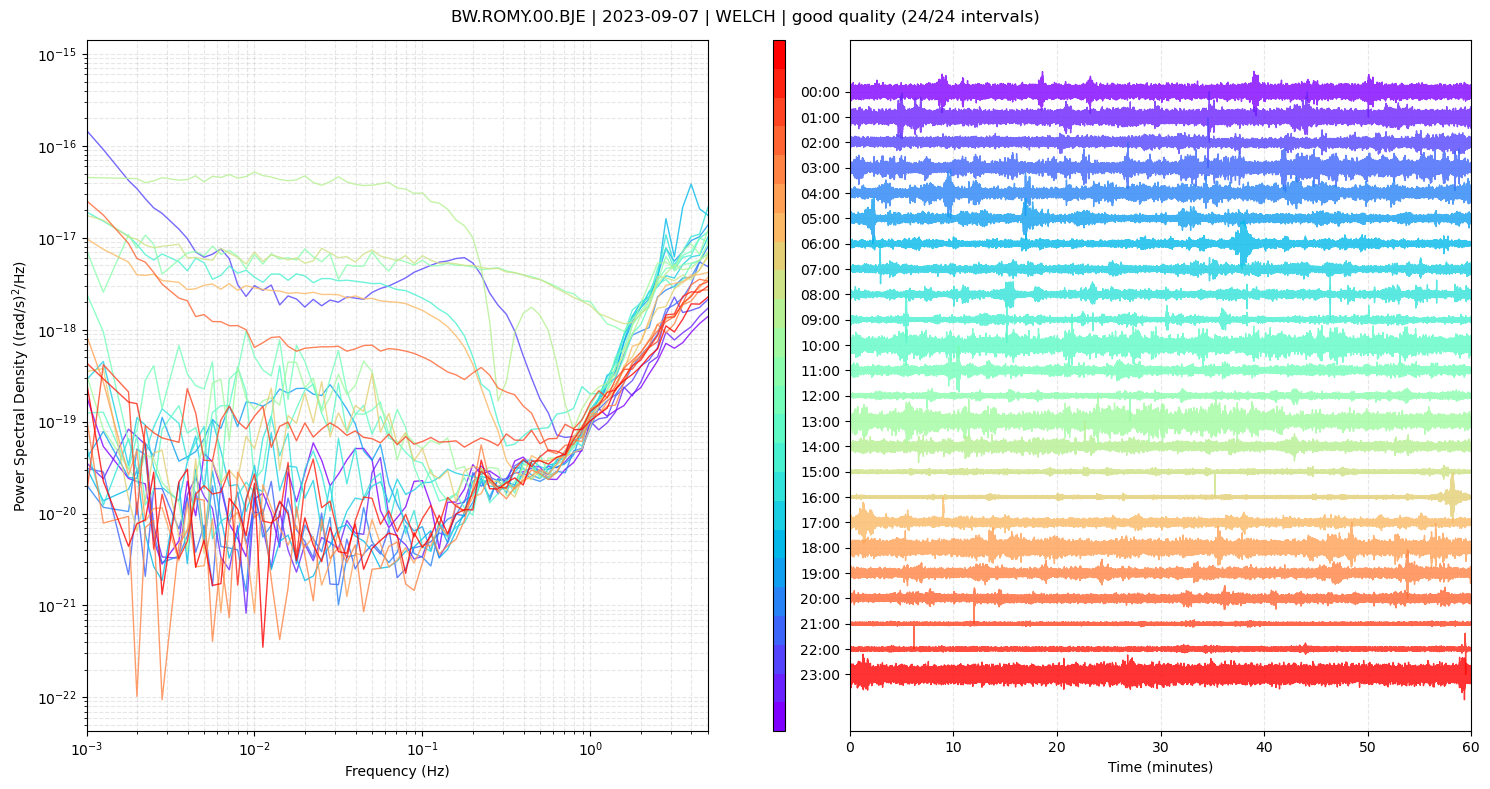

2023-09-08
 -> detrend stream...


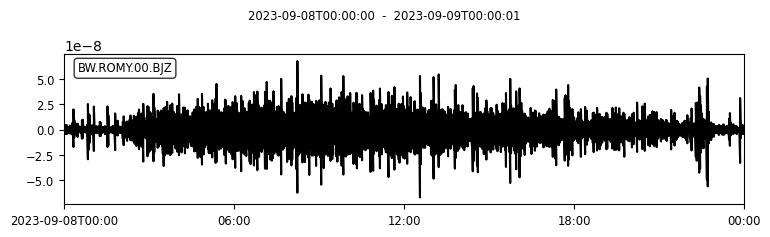

Quality classification: 24 good, 0 bad
Saved to: ./data/spectra/2023/BW/ROMY/BJZ/20230908_BW_ROMY_00_BJZ_spectra.pkl


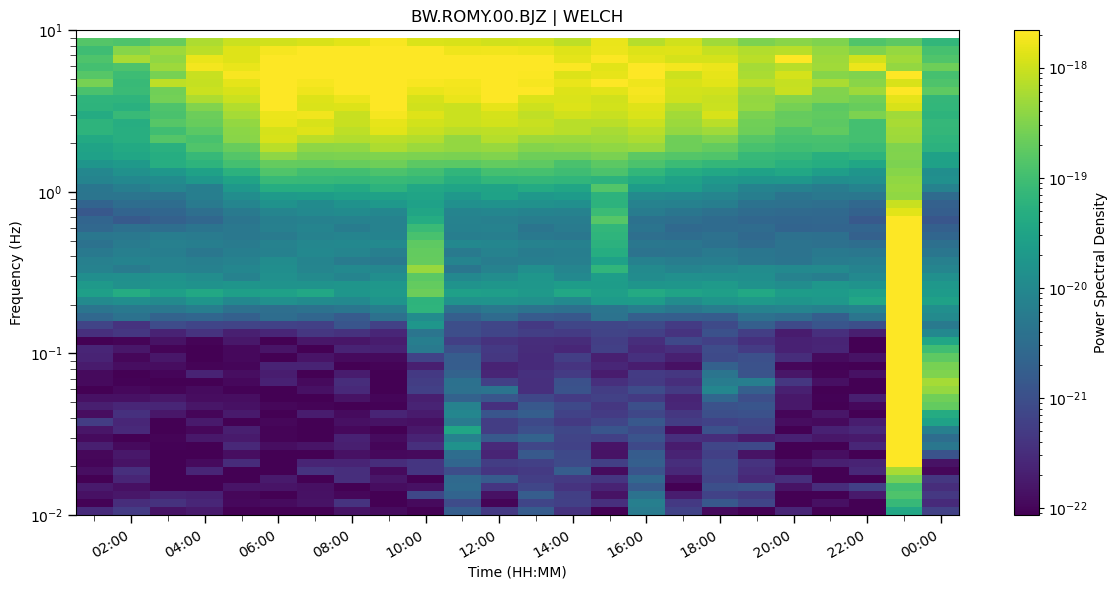

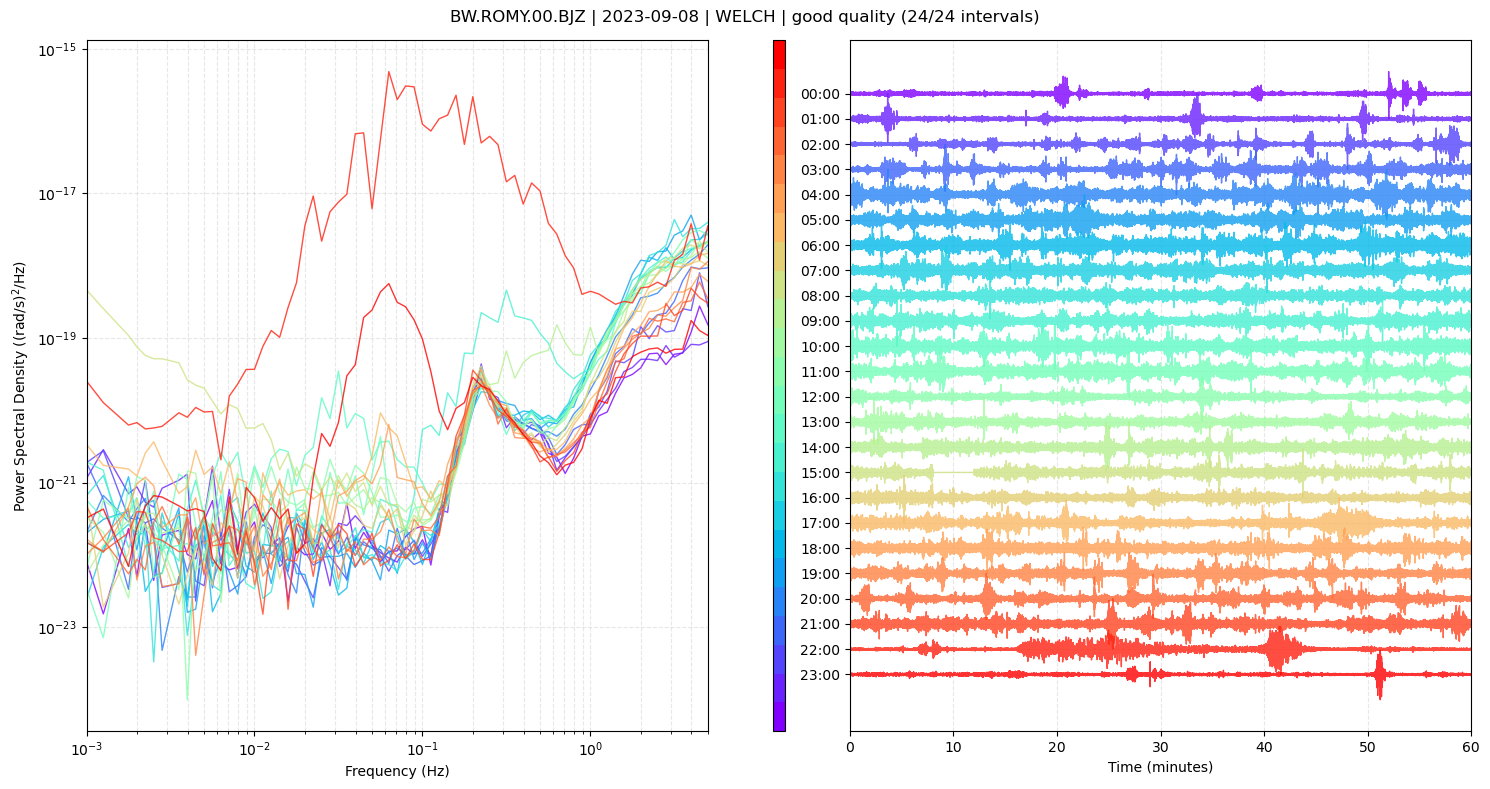

 -> detrend stream...


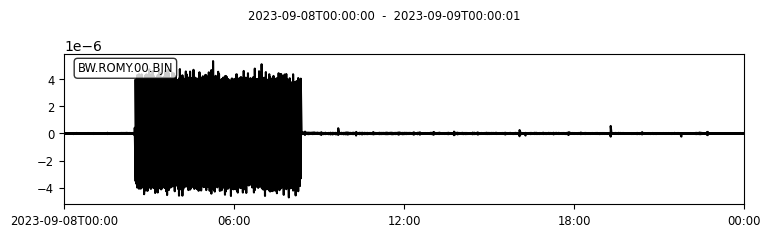

Quality classification: 15 good, 9 bad
Saved to: ./data/spectra/2023/BW/ROMY/BJN/20230908_BW_ROMY_00_BJN_spectra.pkl
Filtered spectrum at index 2 (quality != good)
Filtered spectrum at index 3 (quality != good)
Filtered spectrum at index 4 (quality != good)
Filtered spectrum at index 5 (quality != good)
Filtered spectrum at index 6 (quality != good)
Filtered spectrum at index 7 (quality != good)
Filtered spectrum at index 8 (quality != good)
Filtered spectrum at index 9 (quality != good)
Filtered spectrum at index 19 (quality != good)


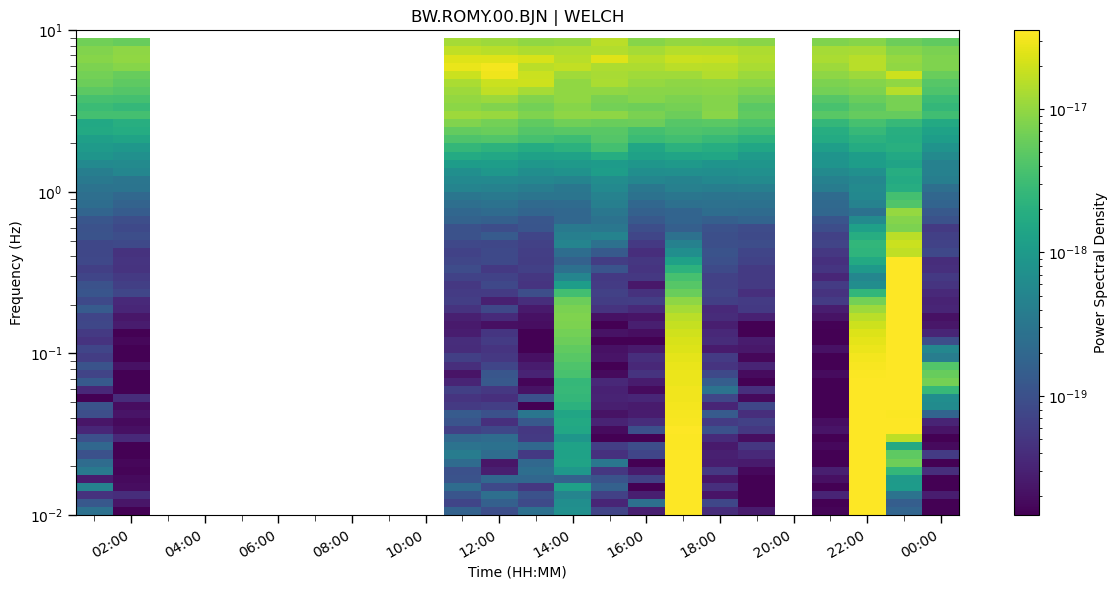

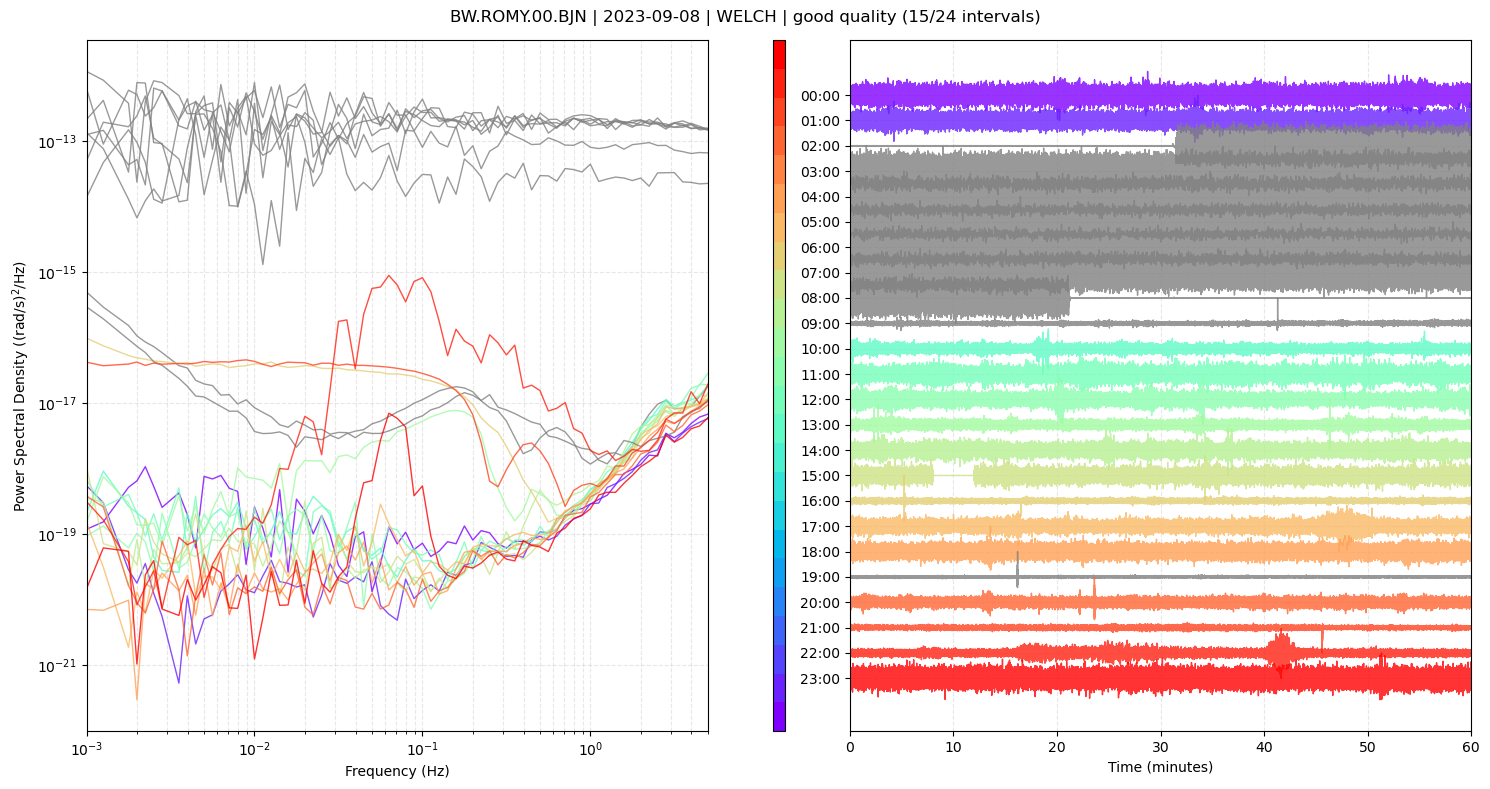

 -> detrend stream...


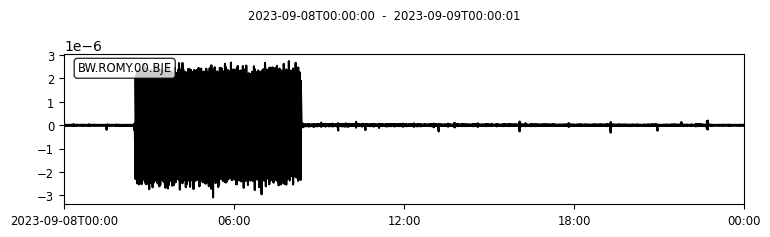

Quality classification: 17 good, 7 bad
Saved to: ./data/spectra/2023/BW/ROMY/BJE/20230908_BW_ROMY_00_BJE_spectra.pkl
Filtered spectrum at index 2 (quality != good)
Filtered spectrum at index 3 (quality != good)
Filtered spectrum at index 4 (quality != good)
Filtered spectrum at index 5 (quality != good)
Filtered spectrum at index 6 (quality != good)
Filtered spectrum at index 7 (quality != good)
Filtered spectrum at index 8 (quality != good)


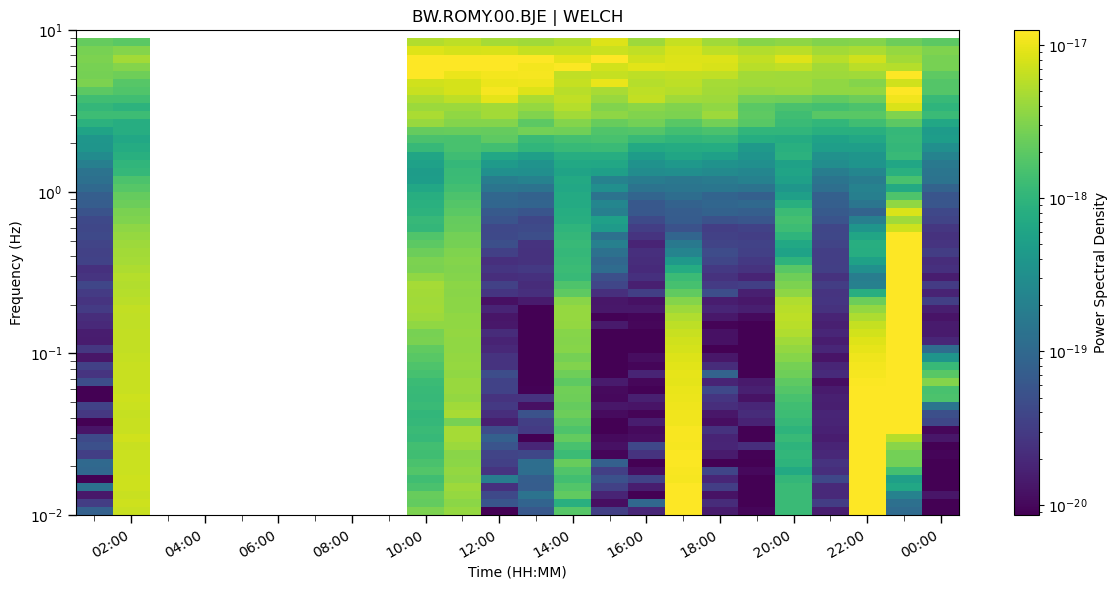

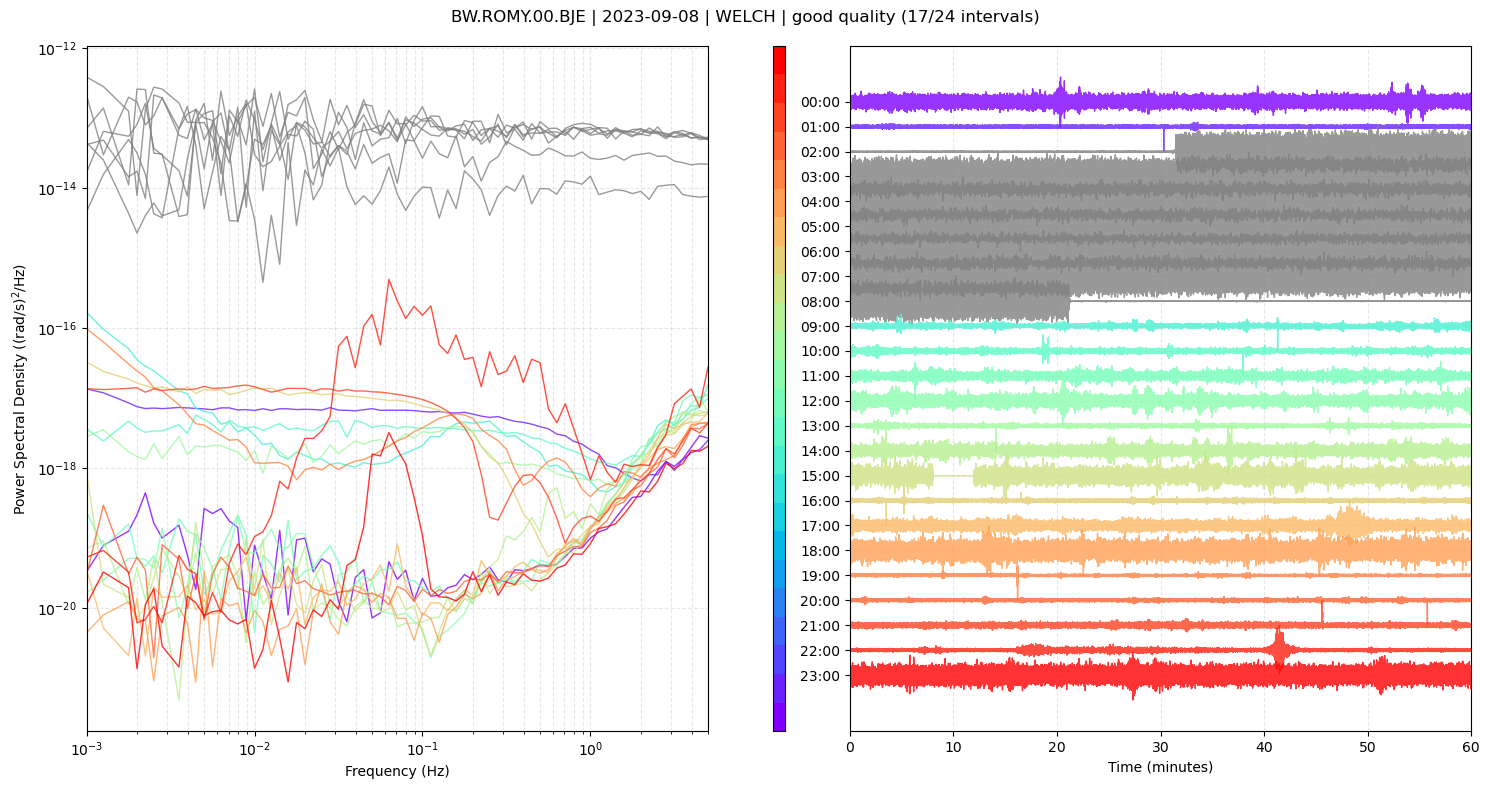

In [8]:
for t1, t2 in times:

    print(t1.date)

    for seed in config.get('seeds', None):
        # load data stream
        st = sp.read_from_sds(
            seed=seed,
            path_to_archive=config.get('path_to_sds', None),
            tbeg=t1,
            tend=t2+1,
            merge=False,
        )

        if len(st) == 0:
            print(st)
            continue

        st.plot();
        if config['remove_response']:
            st = sp.remove_response(st, config['inventory_file'], output=config.get('output_type', None))

        # add data to spectra object
        sp.add_trace(st[0])

        # compute spectra in time windows as a collection
        sp.get_collection(
            tinterval=config.get('tinterval', None),
            toverlap=config.get('toverlap', None),
            method=config.get('method', None),
        )

        if config.get('apply_average'):
            sp.get_fband_average(
                fraction_of_octave=config.get('fraction_of_octave', None),
                average=config.get('averaging', None)
            )

        # classify collection quality
        sp.classify_collection_quality(threshold=1e-15, # Threshold for high value detection (all above then considered bad)
                                       zero_seq_limit=20, # Maximum allowed length of zero sequences
                                       high_seq_limit=20, # Maximum allowed length of high value sequences
                                       flat_seq_limit=20, # Maximum allowed length of flat-line segments
        )

        # store spectra in day files
        sp.save_collection(config['path_to_data_out'])

        # plot the spectra
        # sp.plot_collection(mode=None)

        # plot spectra as spectrogram
        sp.plot_spectrogram(quality_filter='good')

        # Customized plot
        fig = sp.plot_spectra_and_helicorder(
            fmin=0.001, # Minimum frequency
            fmax=5.0, # Maximum frequency
            cmap='rainbow', # Color map
            alpha=0.8, # Transparency value
            data_unit=config.get('data_unit', None), # Data unit
            quality_filter='good', # Filter out bad quality spectra
            out=True, # Output figure object
            show=True, # Show figure
        )

        # Create filepath and filename
        net, sta, loc, cha = seed.split('.')
        filepath = f"{net}/{sta}/{cha}/"
        filename = f"{str(t1.date).replace('-', '')}.png"

        # Create directory if it doesn't exist
        if not os.path.exists(f"{config.get('path_to_figures_out')}{filepath}"):
            os.makedirs(f"{config.get('path_to_figures_out')}{filepath}")
        
        # Save figure
        if fig is not None:
            fig.savefig(f"{config.get('path_to_figures_out')}{filepath}{filename}", dpi=150, format='png', bbox_inches='tight')

        del fig
        gc.collect()

In [12]:
sp.plot_collection_statistics()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Found valid template in 20230902_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230902_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230903_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230904_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230905_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230906_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230907_BW_ROMY_00_BJN_spectra.pkl
Loaded: 20230908_BW_ROMY_00_BJN_spectra.pkl
No data for: 2023-09-09 ( 20230909_BW_ROMY_00_BJN_spectra.pkl )
Successfully loaded data for BW.ROMY.00.BJN
Filtered spectrum at index 0 (quality != good)
Filtered spectrum at index 1 (quality != good)
Filtered spectrum at index 2 (quality != good)
Filtered spectrum at index 3 (quality != good)
Filtered spectrum at index 4 (quality != good)
Filtered spectrum at index 5 (quality != good)
Filtered spectrum at index 6 (quality != good)
Filtered spectrum at index 7 (quality != good)
Filtered spectrum at index 8 (quality != good)
Filtered spectrum at index 9 (quality != good)
Filtered spectrum at index 10 (quality != good)
Filter

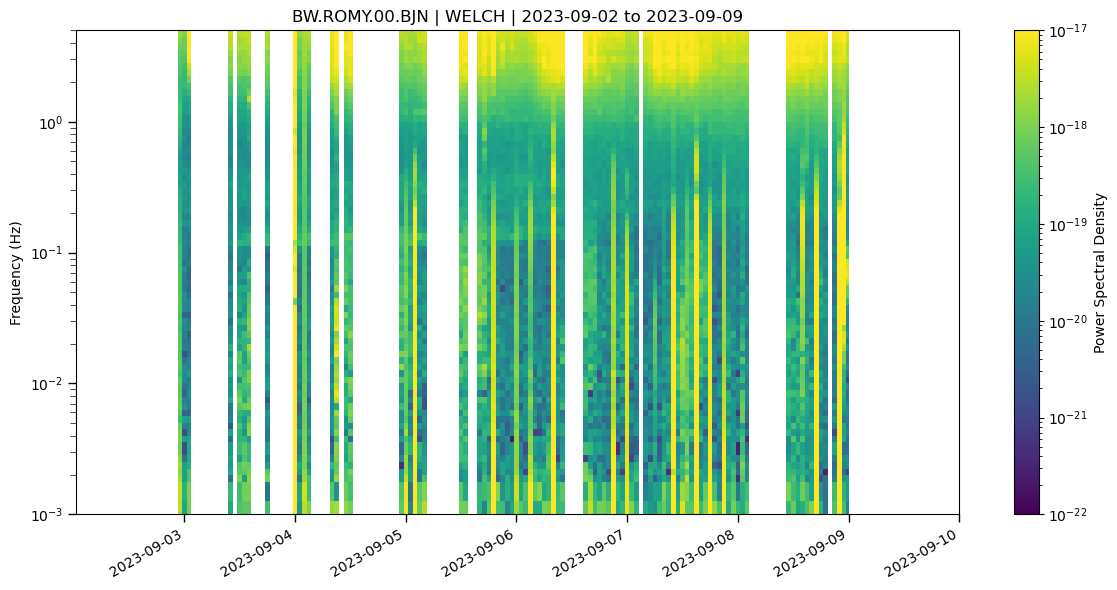

In [ ]:
spec = spectra()

seed = config['seeds'][1]

collections = spectra.load_collections(
    path=config['path_to_data_out'],
    start_date=config['tbeg'],
    end_date=config['tend'],
    seed=seed,
    join=True,
    fill_gaps=True,
)

# Check if collections were loaded successfully
if not collections or seed not in collections:
    print(f"No data found for {seed}")
else:
    print(f"Successfully loaded data for {seed}")
    
    # Set up the spectra object with the loaded collection
    spec.collection = collections[seed]['collection']
    spec.tr_id = seed
    spec.method = collections[seed]['parameters']['method']
    spec.fmin = collections[seed]['parameters']['fmin']
    spec.fmax = collections[seed]['parameters']['fmax']

# Plot the spectrogram with specified frequency limits
fig = spec.plot_spectrogram(fmin=0.001, fmax=5.0,
                            vmin=1e-22, vmax=1e-17,
                            quality_filter='good',
                            out=True,
                            )
